Этот код создает самую простую стратегию - случайную покупку или продажу.

---
Для тестирования стратегии понадобятся исторические данные по интересующему инструменту. Данные должны содержать информацию о датах, ценах открытия (Open), максимальных ценах (High), минимальных ценах (Low), ценах закрытия (Close) и объемах (Volume). Тестовые данные есть в data\1000BTTUSDT.csv


In [1]:
import backtrader as bt
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.rcParams['figure.figsize']=(15,7) # set the figure size

**Шаг 1: Определение Стратегии**  
Сначала определяется класс RndStrategy, наследуемый от bt.Strategy. В этом классе определён только метод next, который вызывается Backtrader на каждом шаге (для каждого нового бара данных). Внутри next происходит случайный выбор между покупкой (self.buy()) и продажей (self.sell()), с вероятностью 10% на каждом шаге. Если решение принято на покупку или продажу, сделка осуществляется с размером в 100000 единиц.

**Шаг 2: Создание и Настройка Backtrader (Cerebro)**  
Создаётся экземпляр Cerebro, который является основным классом для выполнения бэктестинга в Backtrader. К нему добавляется стратегия RndStrategy через метод addstrategy.

**Шаг 3: Загрузка Данных**  
Используется исторические данные из CSV-файла, указанного в dataname. Здесь данные ожидаются содержать информацию о времени, цене открытия (open), максимальной (high), минимальной (low), закрытия (close) и объёме торгов (volume). Формат времени указан как месяц/день/год час:минута, что соответствует формату даты и времени в CSV. Эти данные добавляются в Cerebro для использования в бэктестинге.

**Шаг 4: Настройка Начального Капитала**  
Устанавливается начальный капитал для симуляции в размере 1000 единиц валюты через broker.setcash.

**Шаг 5: Настройка комиссии брокера**  
Устанавливается через broker.setcommission. Может быть установлена как комиссия за объем сделки, фиксированная за сделку или смешанная.

**Шаг 6: Запуск Бэктестинга**  
Вызов cerebro.run() запускает процесс бэктестинга, в ходе которого Backtrader итеративно проходит через исторические данные, применяя логику стратегии RndStrategy на каждом шаге.  
**Итерация по данным:** Для каждого временного шага (например, для каждого дня или часа, в зависимости от временного разрешения данных) Cerebro выполняет методы next() стратегии.  
**Выполнение сигналов:** Внутри метода next(), стратегия анализирует текущие данные и может генерировать торговые сигналы (использовать self.buy() или self.sell() для исполнения сделок). Backtrader отслеживает все сделки и изменения в портфеле.  
**Управление позициями:** Стратегия может также управлять открытыми позициями, например, закрывать их по определённым условиям.


**Шаг 7: Вывод Итогового Значения Портфеля**  
После завершения бэктестинга выводится итоговое значение портфеля, которое показывает, как изменился начальный капитал в результате торговли.

**Шаг 8: Отрисовка Графика**  
Последним шагом является визуализация результатов бэктестинга с помощью метода plot, который строит график цен в стиле 'candlestick' (японские свечи).
  
Этот пример демонстрирует базовый бэктестинг с использованием Backtrader, но важно отметить, что стратегия основана на случайном выборе действий и скорее всего не будет прибыльной на реальных рынках. Это учебный пример, показывающий механику использования библиотеки.

Final Portfolio Value: 940.53
P/L: -59.47


<IPython.core.display.Javascript object>

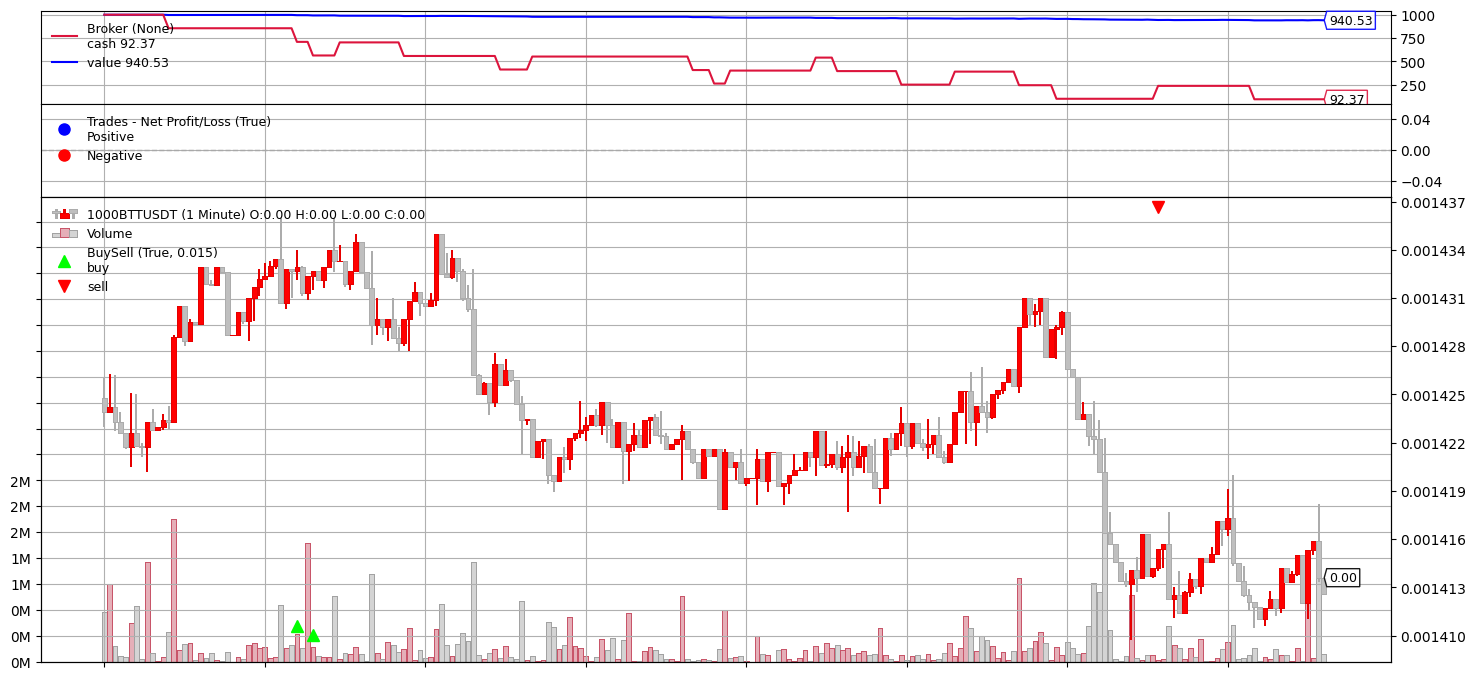

In [75]:
# Создание стратегии
class RndStrategy(bt.Strategy):
    def next(self):
        if np.random.random() < 0.1:
            if np.random.random() < 0.5:
                self.buy(size=100000)
            else:
                self.sell(size=100000)


# Создание и настройка Backtrader
cerebro = bt.Cerebro()
cerebro.addstrategy(RndStrategy)

# Загрузка данных
data = bt.feeds.GenericCSVData(
    dataname='data/1000BTTUSDT.csv',
    datetime=0,
    time = -1, # -1 значит, не испольузется. Время задано в столбце с датой
    open=1,
    high=2,
    low=3,
    close=4,
    volume=5,
    openinterest = -1, # -1 значит, не испольузется.
    dtformat=('%m/%d/%Y %H:%M'),
    timeframe=bt.TimeFrame.Minutes,
    nullvalue=0.0,
    header=True,
)

cerebro.adddata(data)

# Настройка начального капитала
startcash = 1000.0
cerebro.broker.setcash(startcash)
# --------------------------------------------------------------------
# Комиссия брокера 2% от суммы сделки
cerebro.broker.setcommission(0.02)

# Для акций может потребоваться фиксированная комиссия за сделку
# cerebro.broker.setcommission(commission=0.01, pername=True)

# Настройка комиссии с фиксированной стоимостью за сделку плюс процент от суммы сделки
# cerebro.broker.setcommission(commission=0.001,  # Процент комиссии от суммы сделки, например 0.1%
#                            fixed=1.0)          # Фиксированная комиссия за сделку, например 1 единица валюты
# --------------------------------------------------------------------

# Запуск бэктестинга
cerebro.run()

# Вывод итогового значения портфеля
portvalue = cerebro.broker.getvalue()
pnl = portvalue - startcash
print(f'Final Portfolio Value: {portvalue:,.2f}')
print(f'P/L: {pnl:,.2f}')


# Отрисовка графика
cerebro.plot(style='candlestick')[0][0]